## Data Source

The data is downloaded from European Centre for Disease Prevention and Control. And it is uploaded to S3 bucket already. Now let's import necessary libs. 

In [1]:
%matplotlib inline
import pandas

## Import Data from S3 Bucket

In [3]:
df = pandas.read_excel('s3://wenliant-jupyter-notebook-demo1/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx', engine='openpyxl')
df[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## The Sum of Case Numbers per Day

<AxesSubplot:xlabel='dateRep'>

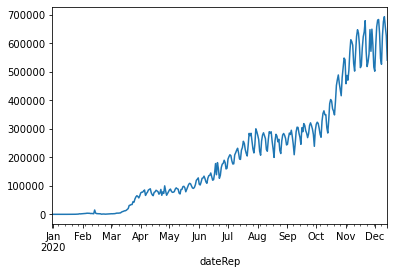

In [5]:
sum_death_by_date = df.groupby('dateRep').sum()['cases']

sum_death_by_date.plot()

## The Top 10 Countries with the Highest Deaths

<AxesSubplot:xlabel='countriesAndTerritories'>

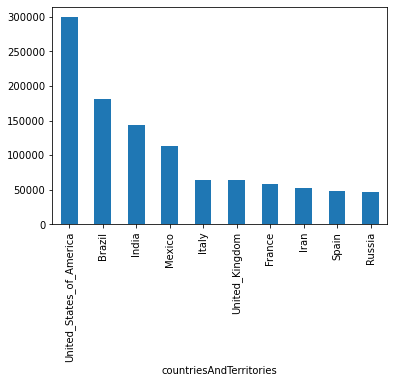

In [6]:
sum_death_by_country = df.groupby('countriesAndTerritories').sum()['deaths']
sum_death_by_country.nlargest(10).plot.bar()

## Take a deeper look into USA Data

In [7]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59001,2020-12-14,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592
59002,2020-12-13,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241
59003,2020-12-12,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183
59004,2020-12-11,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205
59005,2020-12-10,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027
59006,2020-12-09,9,12,2020,217344,2564,United_States_of_America,US,USA,329064917.0,America,784.195114
59007,2020-12-08,8,12,2020,197334,1433,United_States_of_America,US,USA,329064917.0,America,769.896719
59008,2020-12-07,7,12,2020,173432,1111,United_States_of_America,US,USA,329064917.0,America,762.794473
59009,2020-12-06,6,12,2020,211933,2203,United_States_of_America,US,USA,329064917.0,America,757.944062
59010,2020-12-05,5,12,2020,231930,2680,United_States_of_America,US,USA,329064917.0,America,746.870564


## How the Number of Cases is Related to the Number of Deaths

<AxesSubplot:xlabel='cases', ylabel='deaths'>

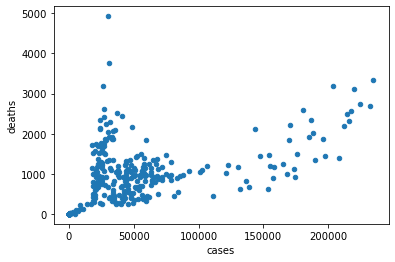

In [8]:
usa_data.plot.scatter(x='cases',y='deaths')